In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
folder_dir = '../data/'
date_range = ["2012","2013","2014","2015","2016","2017"]

In [3]:
for i in range(len(date_range)):
    year = date_range[i]
    data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
    year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
    
    if i == 0:
        data = year_data
    else:
        data = pd.concat([data,year_data])

data.head()

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,break_length,y,x0,on_1b,on_2b,on_3b,umpcall,outcome,offense_score,defense_score
0,2012-04-04,Marlins Park,1,top,johnsjo09,5,beltrca01,0,0,30.626,...,3.4,154.56,-1.902,NaN,NaN,NaN,X,Single,0,0
1,2012-04-04,Marlins Park,1,top,johnsjo09,6,hollima01,0,0,28.580,...,3.8,132.11,-2.052,beltrca01,NaN,NaN,S,NaN,0,0
2,2012-04-04,Marlins Park,1,top,johnsjo09,7,hollima01,0,1,31.294,...,3.7,125.20,-2.130,beltrca01,NaN,NaN,S,NaN,0,0
3,2012-04-04,Marlins Park,1,top,johnsjo09,8,hollima01,0,2,33.548,...,3.6,151.97,-2.100,beltrca01,NaN,NaN,B,NaN,0,0
4,2012-04-04,Marlins Park,1,top,johnsjo09,9,hollima01,1,2,24.925,...,7.1,144.20,-2.312,beltrca01,NaN,NaN,X,Flyout,0,0


In [ ]:
'''
TODO:
    -More exploratory data analysis
    -Feature engineering/Clean data/select features
    -Define target valuable   
    
'''

In [4]:
data = data.drop(['on_1b', 'on_2b', "on_3b",'y'], axis = 1)
data.shape

(3902210, 43)

In [ ]:
_ = plt.hist(data.isnull().sum())

In [ ]:
print(len(data.columns.values))
print(data.columns.values[0])
data.columns.values

In [ ]:
data.isnull().sum()

In [ ]:
data.dtypes

### Finding feature types

In [ ]:
g = data.columns.to_series().groupby(data.dtypes).groups
dtype_groups = {k.name: v for k, v in g.items()}
dtype_groups

In [ ]:
dtype_groups["int64"].values

In [ ]:
dtype_groups["float64"].values

In [ ]:
dtype_groups["object"].values

### Analyze the index

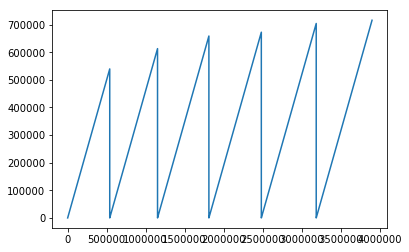

In [10]:
_ = plt.plot(data.index)

### Converting "date" feature to datetime

In [12]:
data["date"]

dtype('O')

In [13]:
data["date"][0:5]

0    2012-04-04
1    2012-04-04
2    2012-04-04
3    2012-04-04
4    2012-04-04
Name: date, dtype: object

In [18]:
pd.to_datetime(data["date"][0:5])

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

In [19]:
data["date"] = pd.to_datetime(data["date"])

In [20]:
data["date"][0:5]

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

### Setting date as index and sorting by pitcher and pitch_count

### Plotting

In [ ]:
#Plotting all Int64 typed features
for i in range(len(dtype_groups["int64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["int64"].values[i])
    plt.hist(data[dtype_groups["int64"].values[i]],
             rwidth = 0.5)

In [ ]:
#Plotting all Float64 typed features
for i in range(len(dtype_groups["float64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["float64"].values[i])
    plt.hist(data[dtype_groups["float64"].values[i]].dropna(),
             rwidth = 0.5)

In [ ]:
_ = data[dtype_groups["object"][0]].value_counts().plot(kind="bar",
                                                    figsize=(20,10),
                                                    title = "Dates")

In [ ]:
#Plotting all Object typed features
for i in range(len(dtype_groups["object"].values)):
    print(dtype_groups["object"][i])
    _ = data[dtype_groups["object"][i]].value_counts().plot(kind="bar",
                                                       figsize=(20,10),
                                                       title = dtype_groups["object"][i])

In [ ]:
plt.hist(data['zone'])

In [ ]:
plt.hist(data['spin_dir'])

### Rolling_mean feature

In [5]:
#data = data.sample(n = 1000)
data.shape

(3902210, 43)

In [7]:
data.loc[data['pitch_type'] == "FF"]["start_speed"][0:5]

0    94.9
1    92.9
2    93.1
3    92.9
6    94.2
Name: start_speed, dtype: float64

In [8]:
data.sort_values(["pitcher"], ascending=True)

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
298195,2013-06-30,Citi Field,6,top,aardsda01,13,bernaro01,2,2,31.9690,...,2013-06-30 18:59:16,86.70,2328.560,50.0,4.2,-1.78500,S,NaN,5,5
472736,2015-08-14,Turner Field,8,top,aardsda01,22,inciaen01,2,2,28.9070,...,2015-08-15 02:10:23,152.49,1907.660,50.0,4.0,-1.41000,S,NaN,1,1
472737,2015-08-14,Turner Field,8,top,aardsda01,23,inciaen01,2,2,30.7800,...,2015-08-15 02:10:56,139.64,2115.570,50.0,3.6,-1.42500,S,NaN,1,1
472738,2015-08-14,Turner Field,8,top,aardsda01,24,inciaen01,2,2,30.5570,...,2015-08-15 02:11:33,118.83,2288.840,50.0,3.7,-1.21700,X,Double,1,1
472739,2015-08-14,Turner Field,8,top,aardsda01,25,polloaj01,0,0,32.9350,...,2015-08-15 02:12:33,122.30,2298.920,50.0,3.0,-1.40600,B,NaN,1,1
472740,2015-08-14,Turner Field,8,top,aardsda01,26,polloaj01,1,0,31.2500,...,2015-08-15 02:13:16,85.78,2108.020,50.0,3.2,-1.31200,S,NaN,1,1
472741,2015-08-14,Turner Field,8,top,aardsda01,27,polloaj01,1,1,30.4410,...,2015-08-15 02:13:54,118.03,2187.590,50.0,2.9,-1.30000,B,NaN,1,1
607867,2013-09-28,Citi Field,7,top,aardsda01,6,aokino01,1,0,20.6820,...,2013-09-28 22:22:38,107.30,86.984,50.0,8.7,-1.97200,S,NaN,1,1
302269,2013-07-01,Citi Field,13,top,aardsda01,40,nievewi01,2,2,23.0160,...,2013-07-02 04:12:08,78.97,670.331,50.0,8.6,-1.91700,X,Groundout,4,4
302268,2013-07-01,Citi Field,13,top,aardsda01,38,nievewi01,1,1,29.1160,...,2013-07-02 04:10:12,83.26,2205.980,50.0,4.5,-1.79600,S,NaN,4,4


In [ ]:
data.sort_values(["pitcher","date","pitch_count"], ascending=True)

In [ ]:
data["date"]

In [ ]:
data.loc[data['pitch_type'] == "FF"].groupby('pitcher')['start_speed'].rolling(5).mean()

In [ ]:
data.head()

## 1. Target variable
We classify a pitch as good if it induces a swinging strike, a called strike, a foul, or if it generates a
ball in play that is converted to an out

In [ ]:
data.outcome.unique()

In [ ]:
data.umpcall.unique()

In [ ]:
data.descr.unique()

In [ ]:
#Using descr feature to define good pitch
g_outcomes=['Foul Tip','Swinging Strike','In play, out(s)', 'Called Strike', 'Foul','Foul (Runner Going)','Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt' ]

#Using outcome feature to use more detailed descriptions (eg: lineout vs groundout). I think this approach is better
g_outcomes2=['Flyout', 'Fly Out','Groundout','Pop Out','Forceout','Double Play','Grounded into DP','Fielders Choice','Fielders Choice Out', 
             'Bunt Groundout','Bunt Pop Out','Sac Fly DP','Bunt Lineout','Foul']

In [ ]:
#Create target feature
data['y']=np.where((data['outcome'].isin(g_outcomes2)) | (data['umpcall']=='S'),1,0)
a=plt.hist(data['y'])

In [ ]:
data.y.unique(), data.y.isnull().any()

In [ ]:
data.columns

## 2. Divide in Train (2012-2106) and Test (2017)

In [ ]:
#Drop columns we´re not going to use
data['year']=data['date'].str.slice(0,4)

features=['umpcall', 'outcome','start_speed','pfx_x','pfx_z','px','pz','break_y','break_angle','break_length','pitch_type',
         'spin_dir','nasty','pitch_count','descr','y','year','zone','strikes','balls','pitcher','pitch_type']
baseline_features=['start_speed','px','pz','year','y']

data=data[features]
data_base=data[baseline_features]

In [ ]:
#data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
#year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
save_path=folder_dir+'data_clean.csv'
data.to_csv(save_path) 

In [ ]:
#data = data.drop(['on_1b', 'on_2b', "on_3b"], axis = 1)
X_train=data_base[data_base['year']!='2017']
y_train=X_train['y']
X_train=X_train.drop(['y','year'],axis=1)

X_test=data_base[data_base['year']=='2017']
y_test=X_test['y']
X_test=X_test.drop(['y','year'],axis=1)

X_train.head()

In [ ]:
X_train.shape

## 3. Baseline with Logistic Regression

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit_transform(X_train)
poly.fit_transform(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
baseline=LogisticRegression()
baseline.fit(X_train,y_train)

In [ ]:
#print(list(zip(list(X_train.columns),list(baseline.coef_[0]))))
baseline.coef_

In [ ]:
probs=baseline.predict_proba(X_test)[:,1]
preds=baseline.predict(X_test)
baseline_loss=sklearn.metrics.log_loss(y_test,probs)
baseline_acc=sklearn.metrics.accuracy_score(y_test,preds)
majority_class=np.amax(y_test.value_counts(normalize=True))

print('%s: %0.2f, %s: %0.2f, %s: %0.2f '
      %('Baseline accuracy',baseline_acc,'Baseline log loss', baseline_loss,'Majority class',majority_class))